In [31]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [25]:
a = np.load('PCA.npz')

In [26]:
a.files

['weights', 'avg_v', 'keigenvectors', 'faces_names']

In [27]:
faces_names = a['faces_names']
weights = a['weights']
avg_v = a['avg_v']
keigenvectors = a['keigenvectors']

In [29]:
num_people = weights.shape[0]

In [38]:
#inertia = sum of square distances in each cluster 
wcss = []
sill = []

for i in range(2, num_people):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(weights)
    wcss.append(kmeans.inertia_)

    labels = kmeans.labels_
    sill.append(silhouette_score(weights, labels, metric = 'euclidean'))

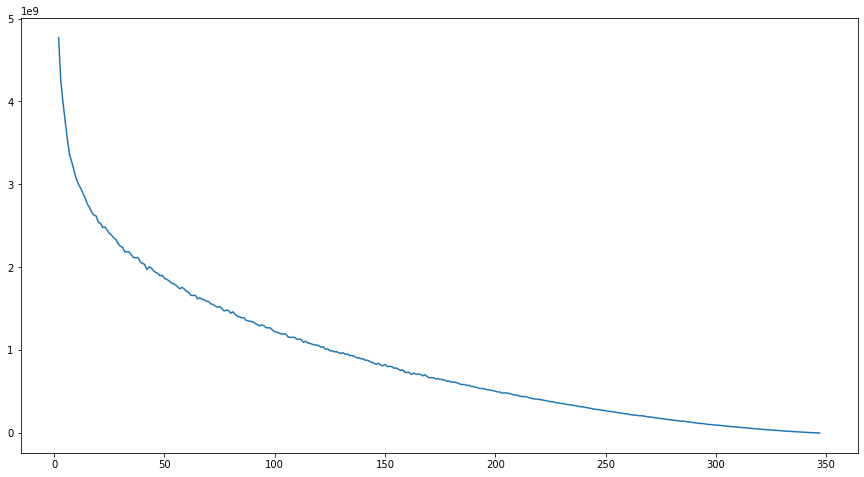

In [81]:
plt.figure(figsize=(15, 8))
plt.plot(list(range(2, num_people)), wcss)
#plt.plot(list(range(2, num_people)), np.zeros(num_people-2))

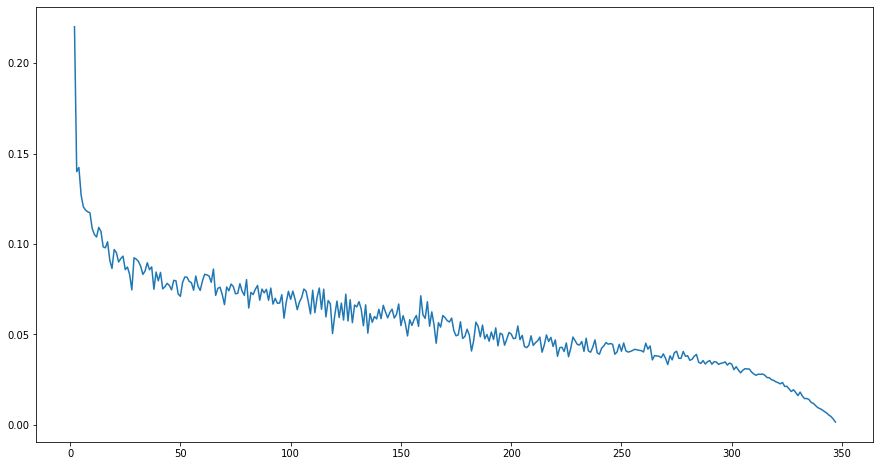

In [82]:
plt.figure(figsize=(15, 8))
plt.plot(list(range(2, num_people)), sill)
#plt.plot(list(range(2, num_people)), np.zeros(num_people-2))

In [71]:
km = KMeans(250).fit(weights)

In [91]:
clusters = km.labels_
people = np.zeros(250, object)
for p in range(clusters.shape[0]):
    cluster_num = clusters[p]
    if people[cluster_num] == 0:
        people[cluster_num] = [('photos/' + faces_names[p])]
    else:
        people[cluster_num].append('photos/' + faces_names[p])

In [108]:
groups = []
for s in people:
    if len(s) > 3:
        groups.append(s)

In [106]:
from matplotlib.image import imread

def plot_horizontal(people):
    figure = plt.figure(figsize=(15, 8))
    num = len(people)
    for i in range(num):
        a = figure.add_subplot(1,num,i+1)
        image = imread(people[i])
        plt.imshow(image)
        plt.axis('off')

def plot_grid(clusters):
    for c in clusters:
        plot_horizontal(c)

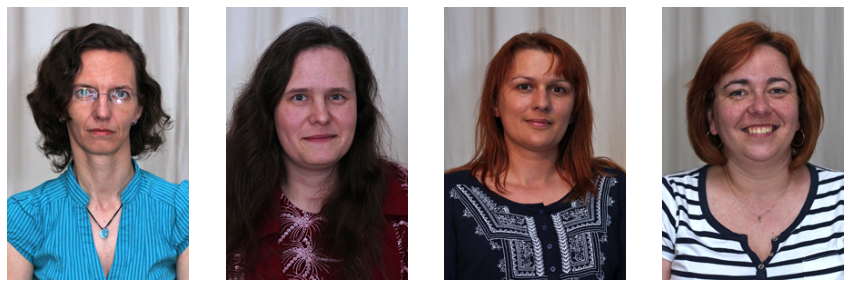

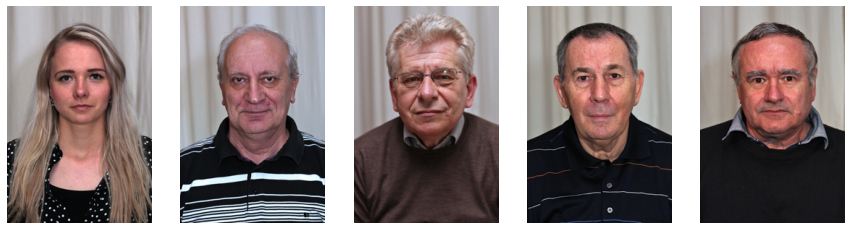

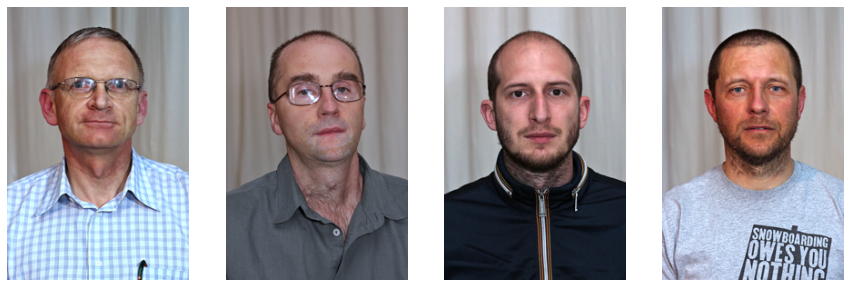

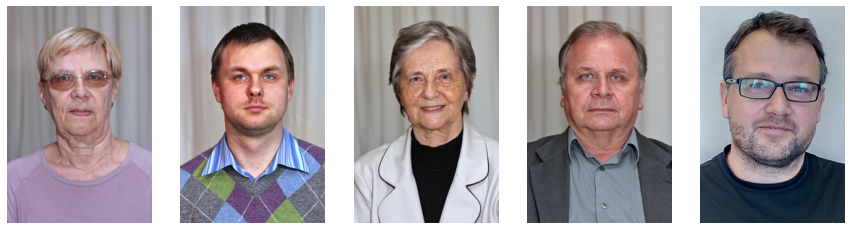

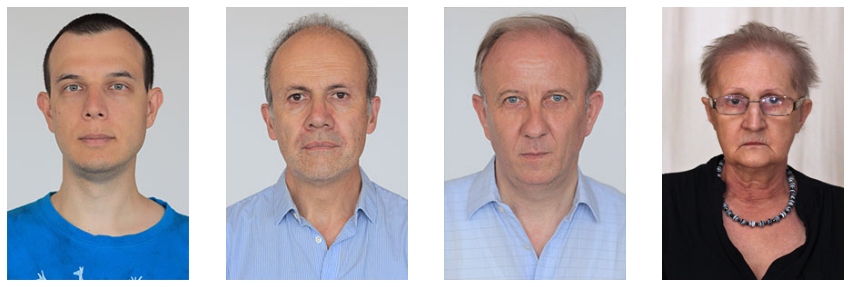

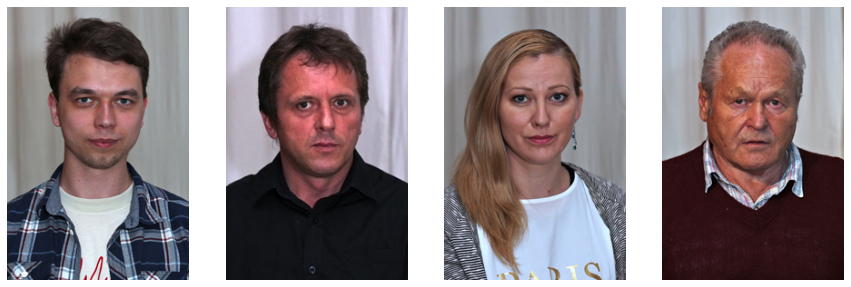

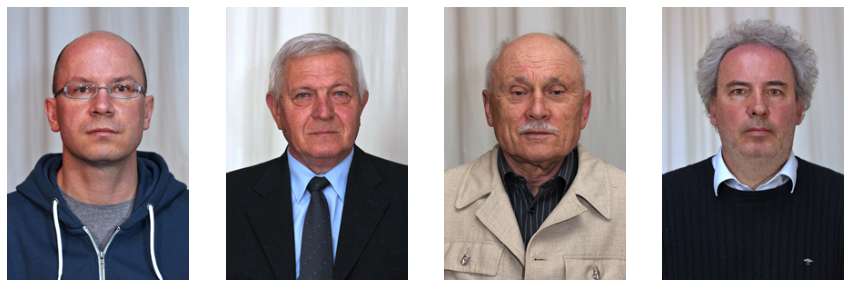

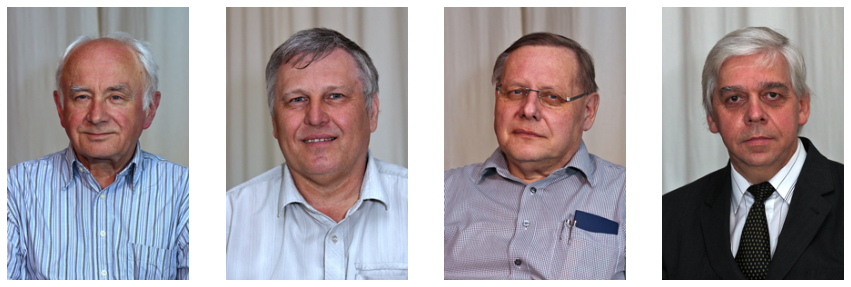

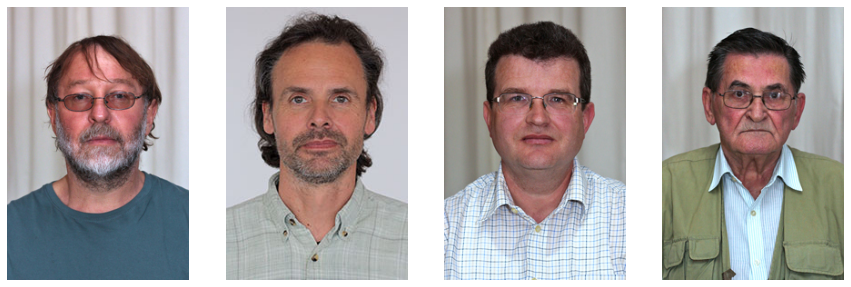

In [109]:
plot_grid(groups)

In [58]:
from sklearn import metrics
from sklearn.cluster import AffinityPropagation

In [62]:
af = AffinityPropagation(random_state=0).fit(weights)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(weights, labels, metric="sqeuclidean")
)

Estimated number of clusters: 28
Silhouette Coefficient: 0.116


In [63]:
X = weights

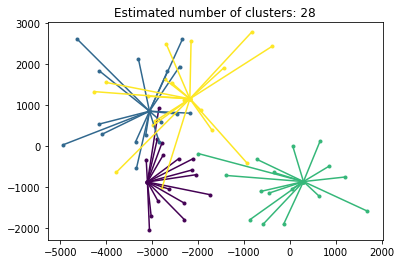

In [65]:
plt.figure(figsize=(20, 10))
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [66]:
#from sklearn.cluster import SpectralClustering
#clustering = SpectralClustering(n_clusters=2,        assign_labels='discretize',
#...         random_state=0).fit(X)